# 1) Data Analysis

The following data is from Jena in Germany and contains various weather data. There are 15 columns with 420,551 samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import datasets, layers, models, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, SimpleRNN, GRU, LSTM
from keras.optimizers import Adagrad, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
import random

C:\Users\brand\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\brand\Anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\brand\Anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


1) Download the Jena Climate 2009-20016 dataset (collected from Jena, German):
https://www.kaggle.com/stytch16/jena-climate-2009-2016

2) Investigate the data in the file. More analysis can be seen on the kaggle link above.

3) Extract the data in the file. The goal would be to develop a RNN for predicting temperature.

4) Split the data into training and testing data

5) Use a SimpleRNN model applied to the temperature data alone. Experiment with various recursions (i.e. look back), hidden layer sizes, and number of layers to reduce the error rate. Don't train for over 100 epochs as RNNs have a tendency to overfit.

6) Repeat 5 using an LSTM model.

7) Repeat 5 using a GRU model.

8) Pick the best model (simpleRNN, LSTM, GRU) and then experiment with adding more than temperature data to your predictor (my initial guess is that time of day, month, humidity, wind have a strong impact on temperature). I would recommend scoring those values (i.e. time of day can be rounded to the nearest integer hour).


Graduate Students: Build an RNN for Text Classification.
Start by reading the github: https://github.com/susanli2016/NLP-with-Python/blob/master/Text%20Classification%20model%20selection.ipynb
We are interested in the results of dense NN at the end of the notebook
Data can be downloaded from: https://raw.githubusercontent.com/franciscadias/data/master/stack-overflow-data.csv

Task 1: Implement a 1D convolutional neural net for text classification
Use the code from the github to setup the problem
It's recommended that you do 2 convo layers (conv1d) but with varying filter sizes.
You don't need to train for more than 10 epochs
Compare to the results of the github

Tasks 2: Implement a bidirectional RNN for text classification
You may use a GRU or LSTM.
Compare to the results of the github


In [2]:
# Import dataset
df = pd.read_csv('jena_climate_2009_2016.csv')


In [86]:
# Data Analysis
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

# Names of each column
print("Column names:")
for col in df.columns:
    print(col)
df.corr()

Rows:  420551
Columns:  15
Column names:
Date Time
p (mbar)
T (degC)
Tpot (K)
Tdew (degC)
rh (%)
VPmax (mbar)
VPact (mbar)
VPdef (mbar)
sh (g/kg)
H2OC (mmol/mol)
rho (g/m**3)
wv (m/s)
max. wv (m/s)
wd (deg)


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.005701,-0.007760,-0.063258
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,-0.004689,-0.002871,0.038732
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,-0.004195,-0.002224,0.043599
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.008718,-0.009091,0.049877
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.005020,-0.009921,-0.015912
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,-0.004018,-0.002213,-0.009583
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.009600,-0.010316,0.018418
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.001852,0.005317,-0.030881
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.009479,-0.010163,0.019376
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.009477,-0.010158,0.019607


In [87]:
df.set_index(pd.to_datetime(df['Date Time']), inplace=True)

# Temperature Data
temp_data = df["T (degC)"].values
hourly_data = df.resample('H').mean()
temp_data_hourly = hourly_data["T (degC)"].values


# Normalize Temperatures Values
scaler = MinMaxScaler()
norm_temp_data = scaler.fit_transform(temp_data_hourly.reshape(-1, 1))

# Split data into training and testing sets
train_data, test_data = train_test_split(norm_temp_data, test_size=0.2, shuffle=False)


# Split the training data with a validation set
train_data, validation_set = train_test_split(train_data, test_size=0.2, shuffle=False)

In [ ]:
seq_length = 24
n_features = 1

# Use the previous 24 hours of data as reference for the next hour, split into X and Y values
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
X_val, y_val = create_sequences(validation_set, seq_length)

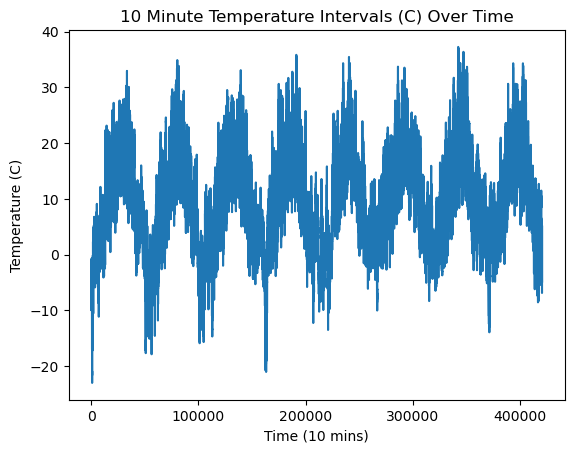

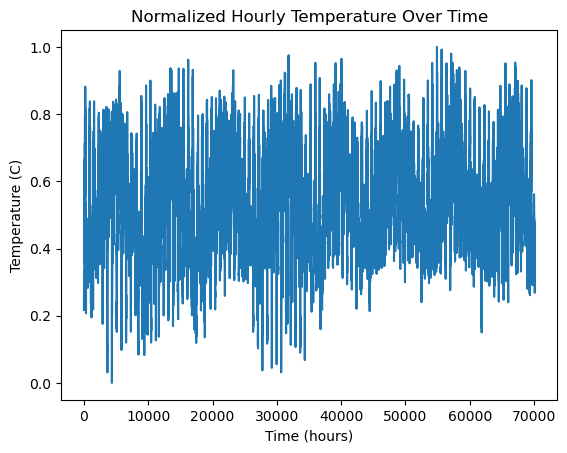

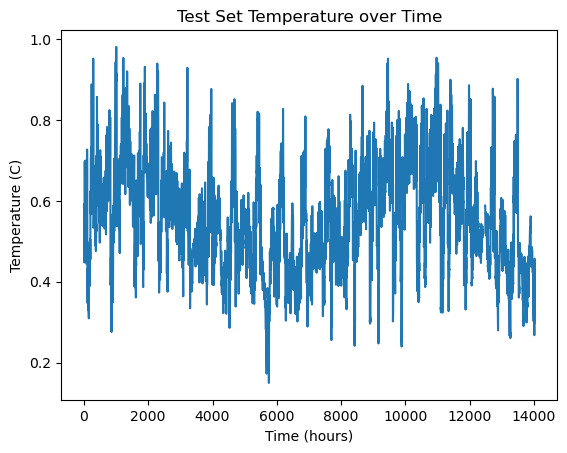

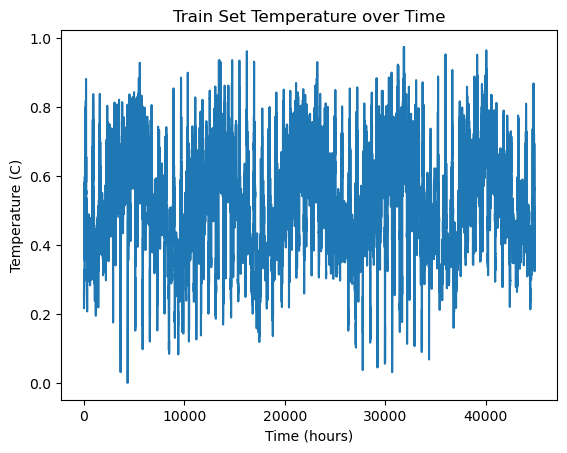

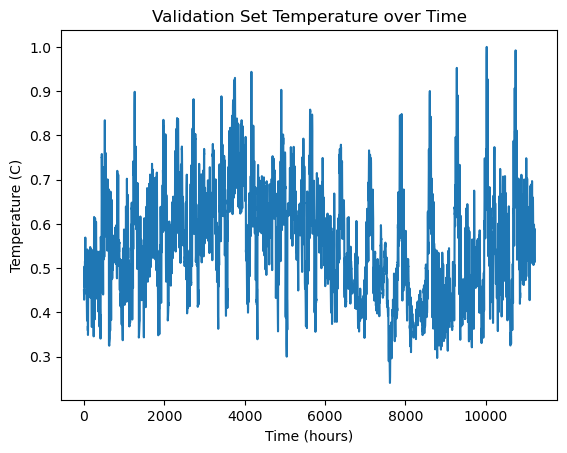

In [44]:
plt.plot(temp_data)
plt.title("10 Minute Temperature Intervals (C) Over Time")
plt.xlabel("Time (10 mins)")
plt.ylabel("Temperature (C)")
plt.show()
plt.plot(norm_temp_data)
plt.title("Normalized Hourly Temperature Over Time")
plt.xlabel("Time (hours)")
plt.ylabel("Temperature (C)")
plt.show()
plt.plot(test_data)
plt.title("Test Set Temperature over Time")
plt.xlabel("Time (hours)")
plt.ylabel("Temperature (C)")
plt.show()
plt.plot(train_data)
plt.title("Train Set Temperature over Time")
plt.xlabel("Time (hours)")
plt.ylabel("Temperature (C)")
plt.show()
plt.plot(validation_set)
plt.title("Validation Set Temperature over Time")
plt.xlabel("Time (hours)")
plt.ylabel("Temperature (C)")
plt.show()

# 2) SimpleRNN Training

Note: Test loss and val loss give NAN but still work on the plots

In [6]:
# SimpleRNN experimentation #1
model = Sequential()
model.add(SimpleRNN(32, input_shape=(seq_length, n_features)))
model.add(Dense(1))

# Compile model
model.compile(optimizer="adam", loss="mse")

# Fit model to the training data
RNN = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

# Evaluate model on the testing data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/10
1122/1122 [==============================] - 9s 7ms/step - loss: 0.0011 - val_loss: 3.4836e-04
Epoch 2/10
1122/1122 [==============================] - 8s 7ms/step - loss: 5.9167e-04 - val_loss: 4.7640e-04
Epoch 3/10
1122/1122 [==============================] - 8s 7ms/step - loss: 5.6791e-04 - val_loss: 3.2415e-04
Epoch 4/10
1122/1122 [==============================] - 7s 6ms/step - loss: 5.5376e-04 - val_loss: 3.3384e-04
Epoch 5/10
1122/1122 [==============================] - 8s 7ms/step - loss: 5.5203e-04 - val_loss: 5.1291e-04
Epoch 6/10
1122/1122 [==============================] - 7s 7ms/step - loss: 5.6034e-04 - val_loss: 3.0762e-04
Epoch 7/10
1122/1122 [==============================] - 7s 7ms/step - loss: 5.5295e-04 - val_loss: 3.0797e-04
Epoch 8/10
1122/1122 [==============================] - 8s 7ms/step - loss: 5.5272e-04 - val_loss: 4.1137e-04
Epoch 9/10
1122/1122 [==============================] - 7s 7ms/step - loss: 5.5087e-04 - val_loss: 3.0282e-04
Epoch 10/10
43

438/438 [==============================] - 1s 3ms/step


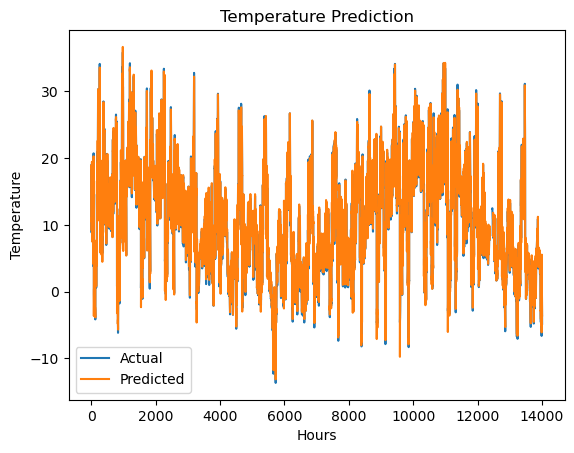

In [7]:
# Using on Test Data
y_pred = model.predict(X_test)

# Inverse transform the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Temperature Prediction')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.show()

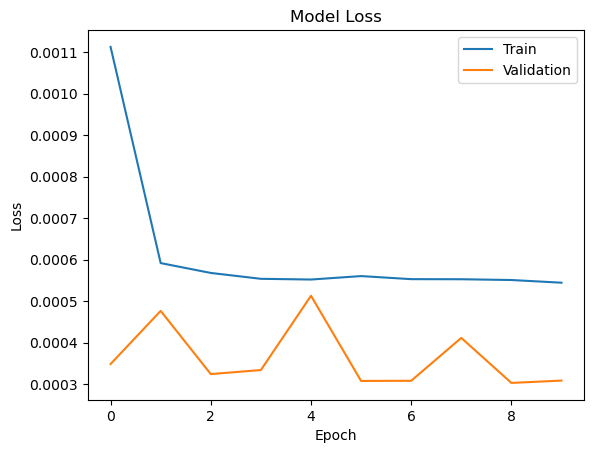

In [8]:
loss = RNN.history['loss']
val_loss = RNN.history['val_loss']

# Plot the loss per epoch
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
# SimpleRNN experimentation #2
model = Sequential()
model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(seq_length, n_features)))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(optimizer="adam", loss="mse", metrics=['accuracy']))

# Fit the model to the training data
RNN = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split= 0.2)

# Evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/10
1122/1122 [==============================] - 14s 11ms/step - loss: 0.0025 - val_loss: 3.5352e-04
Epoch 2/10
1122/1122 [==============================] - 12s 11ms/step - loss: 5.4359e-04 - val_loss: 3.3419e-04
Epoch 3/10
1122/1122 [==============================] - 12s 11ms/step - loss: 5.4377e-04 - val_loss: 2.9265e-04
Epoch 4/10
1122/1122 [==============================] - 12s 11ms/step - loss: 5.2567e-04 - val_loss: 2.7961e-04
Epoch 5/10
1122/1122 [==============================] - 12s 11ms/step - loss: 5.3736e-04 - val_loss: 2.9914e-04
Epoch 6/10
1122/1122 [==============================] - 12s 11ms/step - loss: 5.2442e-04 - val_loss: 3.0755e-04
Epoch 7/10
1122/1122 [==============================] - 12s 11ms/step - loss: 5.2315e-04 - val_loss: 4.0062e-04
Epoch 8/10
1122/1122 [==============================] - 13s 11ms/step - loss: 5.2589e-04 - val_loss: 3.1585e-04
Epoch 9/10
1122/1122 [==============================] - 14s 13ms/step - loss: 5.1614e-04 - val_loss: 3.7172e

438/438 [==============================] - 3s 5ms/step


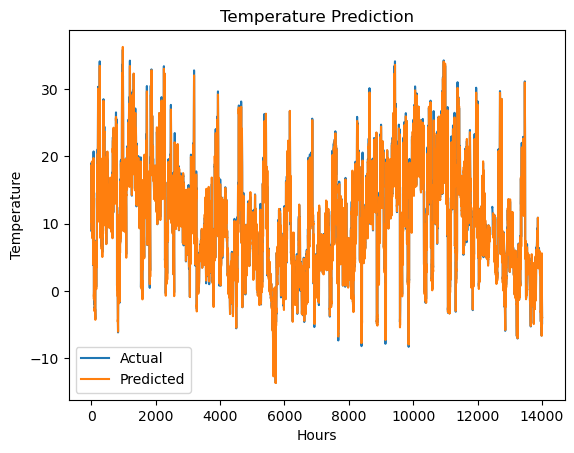

In [19]:
# Using on Test Data
y_pred = RNN.model.predict(X_test)

# Inverse transform the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Temperature Prediction')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.show()

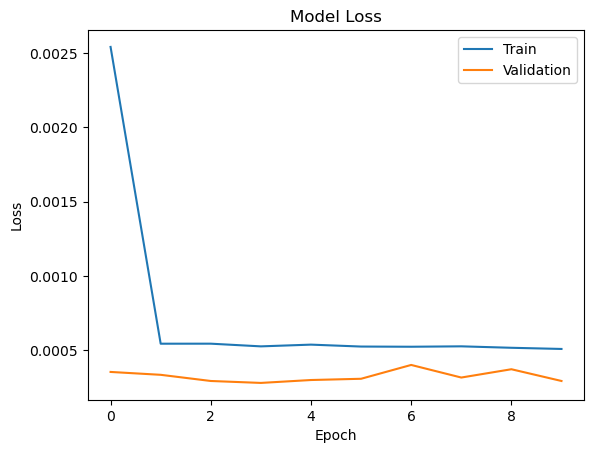

In [20]:
loss = RNN.history['loss']
val_loss = RNN.history['val_loss']

# Plot the loss per epoch
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# 3) LSTM

In [38]:
# LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, n_features)))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
RNN = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

# Evaluate model on the testing data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/10
1122/1122 [==============================] - 18s 14ms/step - loss: 0.0049 - val_loss: 5.8304e-04
Epoch 2/10
1122/1122 [==============================] - 16s 14ms/step - loss: 7.7872e-04 - val_loss: 3.8303e-04
Epoch 3/10
1122/1122 [==============================] - 15s 14ms/step - loss: 6.6252e-04 - val_loss: 4.1909e-04
Epoch 4/10
1122/1122 [==============================] - 16s 14ms/step - loss: 6.0853e-04 - val_loss: 4.8350e-04
Epoch 5/10
1122/1122 [==============================] - 15s 13ms/step - loss: 5.7733e-04 - val_loss: 3.2980e-04
Epoch 6/10
1122/1122 [==============================] - 15s 13ms/step - loss: 5.6115e-04 - val_loss: 8.9463e-04
Epoch 7/10
1122/1122 [==============================] - 15s 14ms/step - loss: 5.5741e-04 - val_loss: 3.1393e-04
Epoch 8/10
1122/1122 [==============================] - 16s 14ms/step - loss: 5.4736e-04 - val_loss: 3.3081e-04
Epoch 9/10
1122/1122 [==============================] - 15s 13ms/step - loss: 5.3056e-04 - val_loss: 4.2468e

438/438 [==============================] - 2s 5ms/step


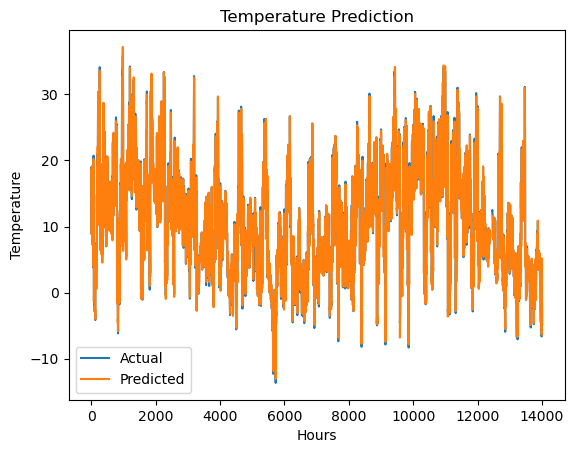

In [39]:
# Using on Test Data
y_pred = RNN.model.predict(X_test)

# Inverse transform the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Temperature Prediction')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.show()

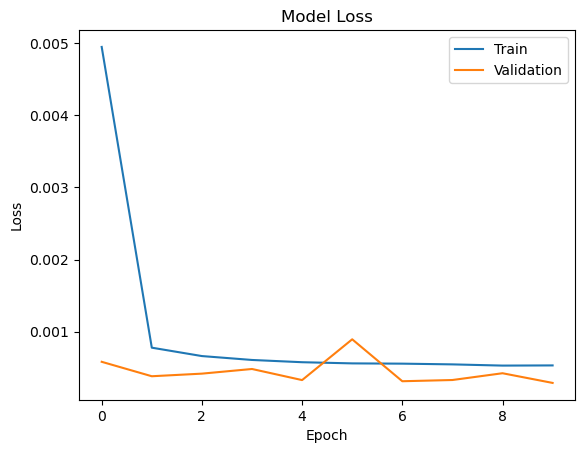

In [40]:
loss = RNN.history['loss']
val_loss = RNN.history['val_loss']

# Plot the loss per epoch
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# 4) GRU

In [45]:
# GRU
model = Sequential()
model.add(GRU(64, input_shape=(seq_length, n_features), return_sequences=True))
model.add(GRU(64, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model to the training data
RNN = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split = 0.2)

# Evaluate model on the testing data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/20
561/561 [==============================] - 24s 35ms/step - loss: 0.0036 - val_loss: 4.0480e-04
Epoch 2/20
561/561 [==============================] - 19s 35ms/step - loss: 6.1120e-04 - val_loss: 3.4118e-04
Epoch 3/20
561/561 [==============================] - 19s 33ms/step - loss: 5.7808e-04 - val_loss: 3.9200e-04
Epoch 4/20
561/561 [==============================] - 20s 35ms/step - loss: 5.7245e-04 - val_loss: 3.6796e-04
Epoch 5/20
561/561 [==============================] - 19s 34ms/step - loss: 5.7386e-04 - val_loss: 3.8970e-04
Epoch 6/20
561/561 [==============================] - 19s 34ms/step - loss: 5.6775e-04 - val_loss: 3.2354e-04
Epoch 7/20
561/561 [==============================] - 19s 34ms/step - loss: 5.6960e-04 - val_loss: 3.0460e-04
Epoch 8/20
561/561 [==============================] - 19s 34ms/step - loss: 5.5175e-04 - val_loss: 3.0564e-04
Epoch 9/20
561/561 [==============================] - 20s 35ms/step - loss: 5.5342e-04 - val_loss: 3.0189e-04
Epoch 10/20
56

438/438 [==============================] - 5s 10ms/step


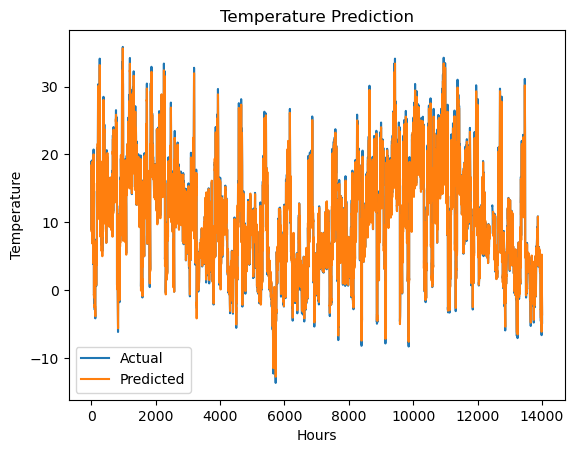

In [46]:
y_pred = model.predict(X_test)

# Inverse transform the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)

# Plot the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Temperature Prediction')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.show()

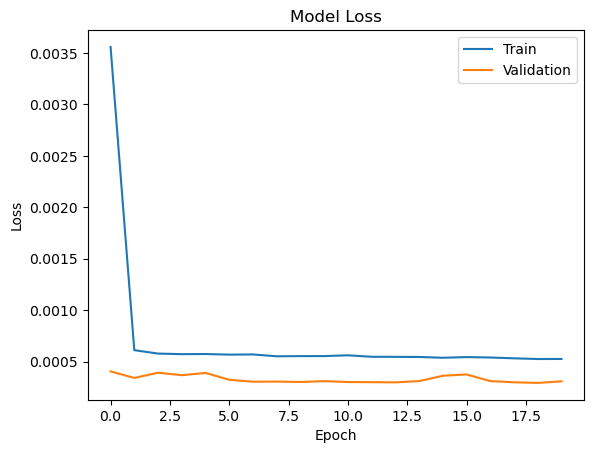

In [47]:
loss = RNN.history['loss']
val_loss = RNN.history['val_loss']

# Plot the loss per epoch
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# 5) Multi-variable RNN (LSTM)

In [3]:
# Humidity + Temperature + Month
df.set_index(pd.to_datetime(df['Date Time']), inplace=True)
hourly_data = df.resample('H').mean()
temp_data_hourly = hourly_data["T (degC)"].values
humidity_data_hourly = hourly_data["rh (%)"].values
month_data = hourly_data.index.month

# Normalize Temperatures and Humidity Values
scaler_humidity = MinMaxScaler()
norm_humidity_data = scaler_humidity.fit_transform(humidity_data_hourly.reshape(-1, 1))
scaler = MinMaxScaler()
norm_temp_data = scaler.fit_transform(temp_data_hourly.reshape(-1, 1))

# Combine the normalized temperature, month, and humidity data into one array
combined_data = np.column_stack((norm_temp_data, month_data, norm_humidity_data))


In [4]:
seq_length = 24
n_features = 3
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        temp = data[i-seq_length:i, 0]
        month = data[i-seq_length:i, 1]
        humidity = data[i-seq_length:i, 2]
        X.append(np.column_stack((temp, month, humidity)))
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [5]:
# Split data into training and testing sets
train_data, test_data = train_test_split(combined_data, test_size=0.2, shuffle=False)

# Split the training data with a validation set
train_data, validation_set = train_test_split(train_data, test_size=0.2, shuffle=False)

# Create input sequences for the RNN
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
X_val, y_val = create_sequences(validation_set, seq_length)    # validation doesn't work

In [6]:
# LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, n_features)))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
RNN = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

# Evaluate model on the testing data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/10
1122/1122 [==============================] - 26s 21ms/step - loss: 0.0039 - val_loss: 5.9819e-04
Epoch 2/10
1122/1122 [==============================] - 19s 17ms/step - loss: 8.5380e-04 - val_loss: 5.0516e-04
Epoch 3/10
1122/1122 [==============================] - 21s 19ms/step - loss: 6.7624e-04 - val_loss: 3.5801e-04
Epoch 4/10
1122/1122 [==============================] - 22s 20ms/step - loss: 6.4290e-04 - val_loss: 3.2552e-04
Epoch 5/10
1122/1122 [==============================] - 19s 17ms/step - loss: 5.9046e-04 - val_loss: 3.8323e-04
Epoch 6/10
1122/1122 [==============================] - 19s 17ms/step - loss: 5.9768e-04 - val_loss: 3.1150e-04
Epoch 7/10
1122/1122 [==============================] - 25s 23ms/step - loss: 5.7808e-04 - val_loss: 3.3400e-04
Epoch 8/10
1122/1122 [==============================] - 30s 26ms/step - loss: 5.7130e-04 - val_loss: 3.0838e-04
Epoch 9/10
1122/1122 [==============================] - 23s 21ms/step - loss: 5.6200e-04 - val_loss: 2.9878e

In [13]:
y_pred = model.predict(X_test)

# Inverse transform the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test_2d = y_test.reshape(-1, 1)
y_test_inv = scaler.inverse_transform(y_test_2d)


438/438 [==============================] - 2s 4ms/step


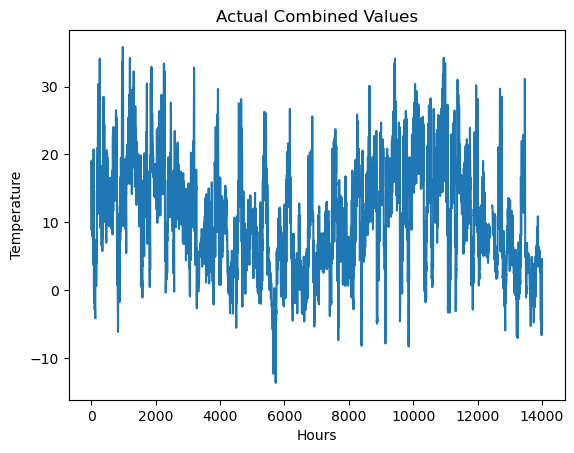

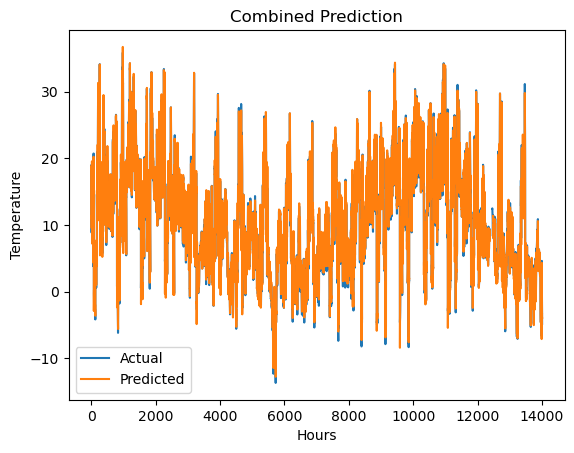

In [18]:
# Plot combined
plt.plot(y_test_inv)
plt.title('Actual Combined Values')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.show()

# Plot combined with RNN prediction
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Combined Prediction')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.show()

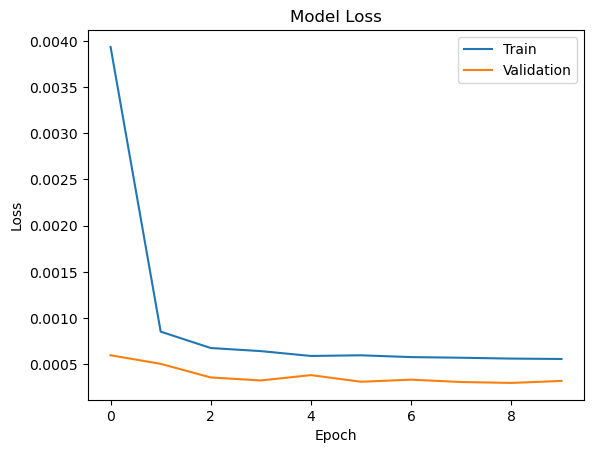

In [20]:
loss = RNN.history['loss']
val_loss = RNN.history['val_loss']

# Plot the loss per epoch
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# 6) Debugging test/val loss

Trying to figure out why it gives NAN for the loss of the validation and test, but still has plottable predictions?


438/438 [==============================] - 2s 4ms/step - loss: nan


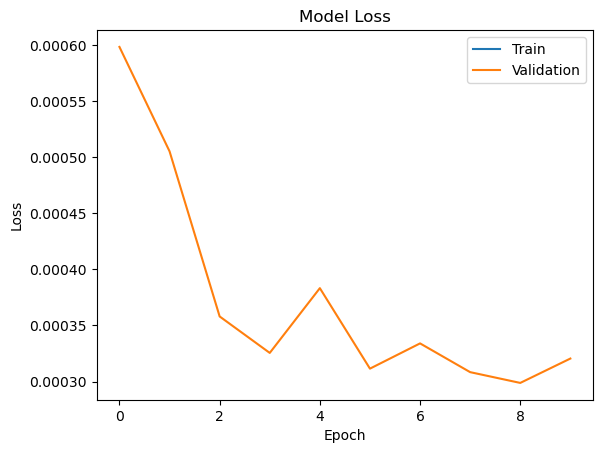

In [24]:
# Evaluate model on the testing data
loss = model.evaluate(X_test, y_test)
val_loss = RNN.history['val_loss']

# Plot the loss per epoch
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [30]:
np.isnan(X_test).any()

True

In [31]:
np.isnan(y_test).any()

True

In [32]:
np.isnan(y_pred).any()

True

In [34]:
np.isnan(combined_data).any()

True

In [35]:
x = [1]
np.isnan(x).any()

False

### Not sure why I have NAN values inside my sets and whether or not this affects my loss?

In [40]:
# Print out predicted output
print("Predicted Output:", y_pred)

Predicted Output: [[18.51934  ]
 [18.839449 ]
 [18.592928 ]
 ...
 [-3.198114 ]
 [-4.052024 ]
 [-4.0197573]]


In [42]:
# Print out predicted values and actual values
for i in range(len(y_test)):
    print('Actual:', y_test[i], '\tPredicted:', y_pred[i][0])

Actual: 0.696467960351808 	Predicted: 18.51934
Actual: 0.6968867792824236 	Predicted: 18.839449
Actual: 0.69331285774117 	Predicted: 18.592928
Actual: 0.6790450928381964 	Predicted: 18.15112
Actual: 0.6545860672902415 	Predicted: 17.031992
Actual: 0.6350411838615106 	Predicted: 15.37882
Actual: 0.6308250732933129 	Predicted: 14.333843
Actual: 0.5963702359346643 	Predicted: 14.455793
Actual: 0.5731397459165155 	Predicted: 12.046551
Actual: 0.5660198240960492 	Predicted: 10.967582
Actual: 0.5663269579785006 	Predicted: 10.95736
Actual: 0.5528130671506353 	Predicted: 11.32964
Actual: 0.5399692866117549 	Predicted: 10.594383
Actual: 0.5277956163618596 	Predicted: 10.0049095
Actual: 0.5325701521708782 	Predicted: 9.524857
Actual: 0.5409465307831915 	Predicted: 10.42698
Actual: 0.5758481083344968 	Predicted: 11.19122
Actual: 0.6119782214156081 	Predicted: 13.967632
Actual: 0.6435571687840291 	Predicted: 16.279942
Actual: 0.6604216110568198 	Predicted: 17.869938
Actual: 0.6712829819907861 	Pr

## The code below shows val loss for a bit but hits NAN after reaching a really small number (using the multi-variate RNN model). 


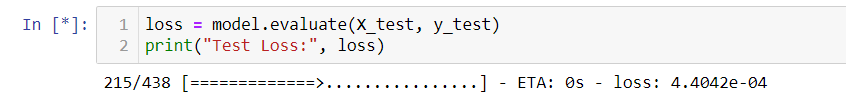

In [49]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

438/438 [==============================] - 2s 5ms/step - loss: nan
Test Loss: nan


In [55]:
loss = model.evaluate(X_val, y_val)
print("Test Loss:", loss)

350/350 [==============================] - 2s 4ms/step - loss: nan
Test Loss: nan


In [56]:
loss = model.evaluate(X_train, y_train)
print("Test Loss:", loss)

1402/1402 [==============================] - 6s 5ms/step - loss: 4.8187e-04
Test Loss: 0.00048187034553848207
